# Graph Learning
## Lab 3: Clustering

In this lab, you will learn to cluster a graph by Louvain and interpret the results. 

## Import

In [53]:
from IPython.display import SVG

In [54]:
import numpy as np
from scipy import sparse

In [55]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [56]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [57]:
dataset = grid(9, 9, True)
adjacency = dataset.adjacency
position = dataset.position

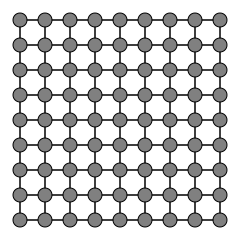

In [58]:
image = visualize_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and return the corresponding modularity.
* Try to shuffle the nodes and observe the results.
* Find a better clustering than Louvain in terms of modularity. Comment your results.

In [59]:
louvain = Louvain()

In [60]:
labels = louvain.fit_predict(adjacency)

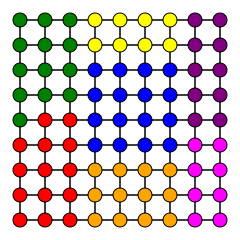

In [61]:
image = visualize_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [62]:
get_modularity(adjacency, labels)

np.float64(0.6220341435185185)

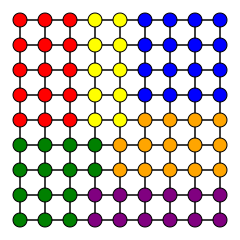

In [63]:
shuffled_nodes = np.random.permutation(adjacency.shape[0])
adjacency_shuffled = adjacency[shuffled_nodes][:, shuffled_nodes]
position_shuffled = position[shuffled_nodes]

labels_shuffled = louvain.fit_predict(adjacency_shuffled)

image = visualize_graph(adjacency_shuffled, position_shuffled, labels=labels_shuffled, width=200, height=200)
SVG(image)

In [64]:
get_modularity(adjacency_shuffled, labels_shuffled)

np.float64(0.6286892361111112)

We can see that we have the same amount of clusters (7 clusters) and each cluster have the same amount of nodes than before the shuffle

Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
Modularity: 3.1086244689504383e-15


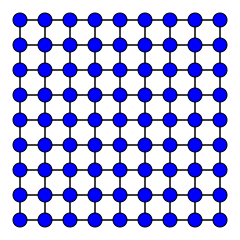

Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]
Modularity: -0.012683256172839504


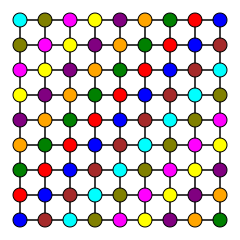

Labels: [0 0 0 3 3 3 6 6 6 0 0 0 3 3 3 6 6 6 0 0 0 3 3 3 6 6 6 1 1 1 4 4 4 7 7 7 1
 1 1 4 4 4 7 7 7 1 1 1 4 4 4 7 7 7 2 2 2 5 5 5 8 8 8 2 2 2 5 5 5 8 8 8 2 2
 2 5 5 5 8 8 8]
Modularity: 0.638454861111111


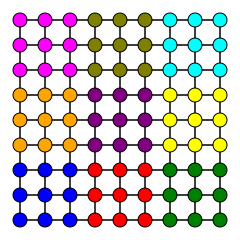

In [65]:
# Find better clustering

louvain = Louvain()
n = adjacency.shape[0]
list_labels = [np.zeros(n, dtype=int), np.arange(n), np.array([((i%9)//3)*3+(i//9)//3 for i in range(n)])]

for labels in list_labels:
    print('Labels:', labels)
    print('Modularity:', get_modularity(adjacency, labels))
    image = visualize_graph(adjacency, position, labels=labels, width=200, height=200)
    display(SVG(image))

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [66]:
dataset = karate_club(metadata=True)

In [67]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

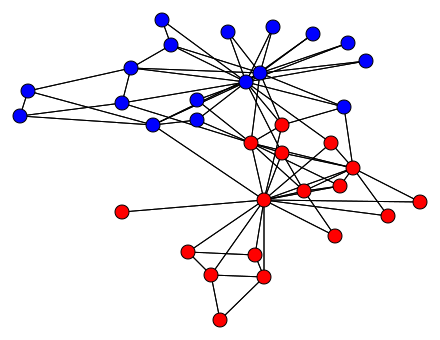

In [68]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels. Give the modularity. 
* Compare with the modularity obtained with the ground-truth labels and comment the results.
* Display the aggregate graph after clustering by Louvain (check this [tutorial](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/louvain.html)).
* Adapt the resolution to get 2 clusters. Compare with the ground-truth and comment the results.

In [69]:
louvain = Louvain()

In [70]:
labels = louvain.fit_predict(adjacency)

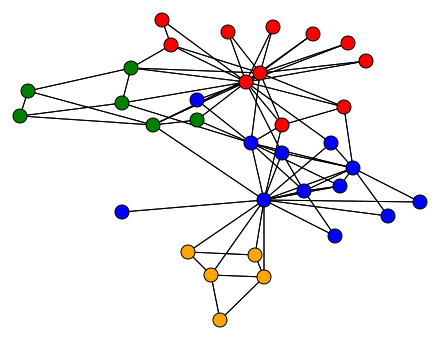

In [71]:
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

In [72]:
get_modularity(adjacency, labels)

np.float64(0.41880341880341876)

In [73]:
modularity_true = get_modularity(adjacency, labels_true)
print("Modularity with ground-truth labels:", modularity_true)

Modularity with ground-truth labels: 0.3582347140039448


In [74]:
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership

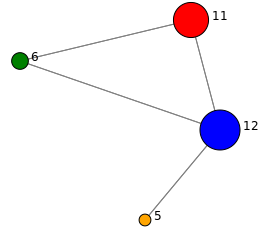

In [75]:
# Aggregate graph

adjacency_aggregate = louvain.aggregate_

average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)

image = visualize_graph(adjacency_aggregate, position_aggregate, counts, labels=labels_unique, display_node_weight=True, width=200, height=200)
SVG(image)

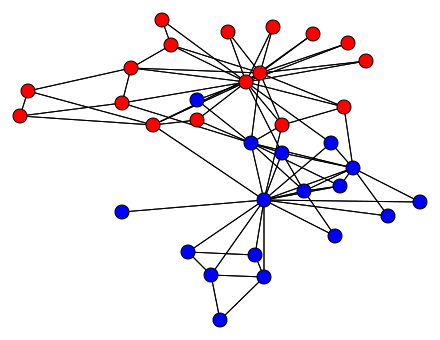

In [76]:
# Adapt Louvain resolution to get 2 clusters
louvain_2 = Louvain(resolution=0.3)  # Lower resolution to get fewer clusters
labels_2 = louvain_2.fit_predict(adjacency)

image = visualize_graph(adjacency, position, labels=labels_2)
SVG(image)

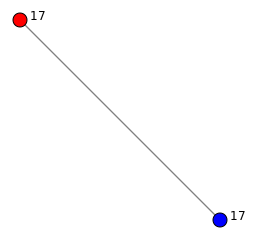

In [77]:
# Aggregate with 2 clusters

adjacency_aggregate_2 = louvain_2.aggregate_

average_2 = normalize(get_membership(labels_2).T)
position_aggregate_2 = average_2.dot(position)
labels_unique_2, counts_2 = np.unique(labels_2, return_counts=True)

image = visualize_graph(adjacency_aggregate_2, position_aggregate_2, counts_2, labels=labels_unique_2, display_node_weight=True, width=200, height=200)
SVG(image)

## Openflights


In [78]:
dataset = openflights

In [79]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

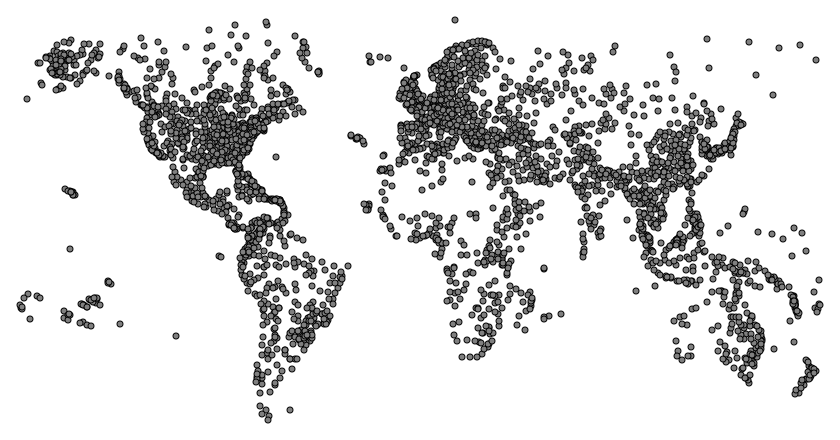

In [80]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? How to interpret this result?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph. Name each cluster by its top airport and display the total traffic of each cluster by the node size.
* Display the same graph restricted to clusters with at least 100 nodes.
* What is the cluster with the highest traffic?

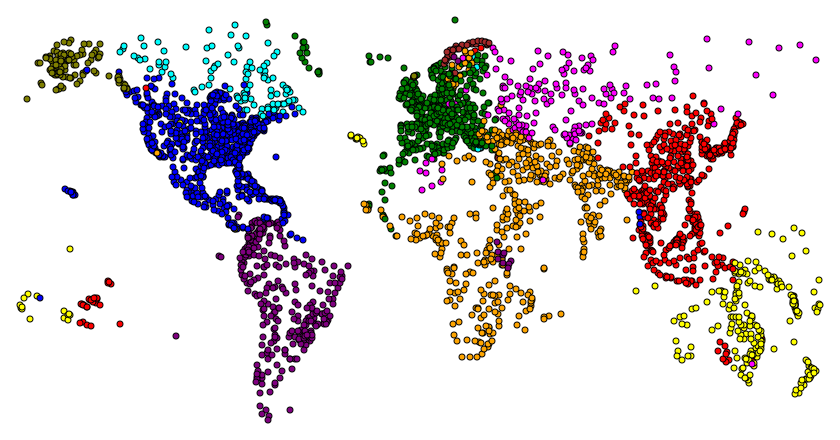

In [81]:
louvain = Louvain()
labels = louvain.fit_predict(adjacency)
image = visualize_graph(adjacency, position, labels=labels, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

In [82]:
labels_unique, counts = np.unique(labels, return_counts=True)
print('Number of clusters:', len(labels_unique))

Number of clusters: 30


In [83]:
simpson_index = get_modularity(adjacency, labels, return_all=True)[2]
print("Simpson index of the clustering:", simpson_index)

Simpson index of the clustering: 0.21561672420352695


The Simpson index of this clustering is 0.21561672420352695, whi

In [84]:
n = adjacency.shape[0]
weights = adjacency.dot(np.ones(n))
airports = []
for label in labels_unique:
    cluster = np.argwhere(labels == label).ravel()
    airports.append(cluster[np.argmax(weights[cluster])])

for i, airport_idx in enumerate(airports):
    print(f"Cluster {labels_unique[i]}: {names[airport_idx]}")

Cluster 0: Hartsfield Jackson Atlanta International Airport
Cluster 1: Beijing Capital International Airport
Cluster 2: Amsterdam Airport Schiphol
Cluster 3: Atatürk International Airport
Cluster 4: Guarulhos - Governador André Franco Montoro International Airport
Cluster 5: Sydney Kingsford Smith International Airport
Cluster 6: Domodedovo International Airport
Cluster 7: Ted Stevens Anchorage International Airport
Cluster 8: Quebec Jean Lesage International Airport
Cluster 9: Trondheim Airport Værnes
Cluster 10: Sioux Lookout Airport
Cluster 11: Faa'a International Airport
Cluster 12: Godthaab / Nuuk Airport
Cluster 13: Stockholm-Bromma Airport
Cluster 14: Nairobi Wilson Airport
Cluster 15: João Paulo II Airport
Cluster 16: Touat Cheikh Sidi Mohamed Belkebir Airport
Cluster 17: Kirkwall Airport
Cluster 18: Sitia Airport
Cluster 19: Eilat Airport
Cluster 20: Myeik Airport
Cluster 21: Ivalo Airport
Cluster 22: St. Mary's Airport
Cluster 23: Pori Airport
Cluster 24: Vilhelmina Airport
C

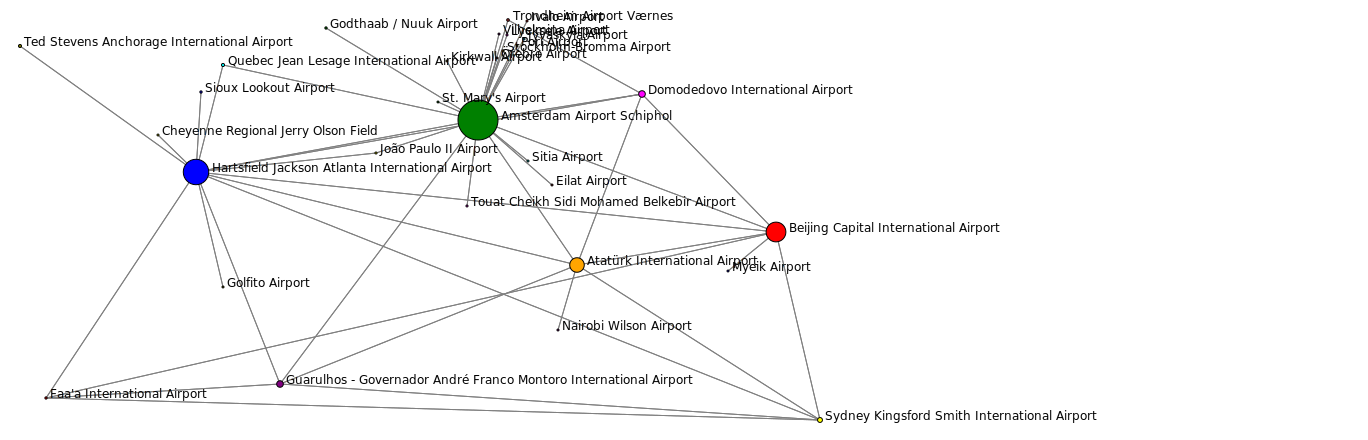

In [85]:
adjacency_aggregate = louvain.aggregate_
average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)

image = visualize_graph(adjacency_aggregate, position_aggregate, names=names[airports], labels=np.unique(labels), display_node_weight=True, width=800, height=400, edge_width_max=200)
SVG(image)

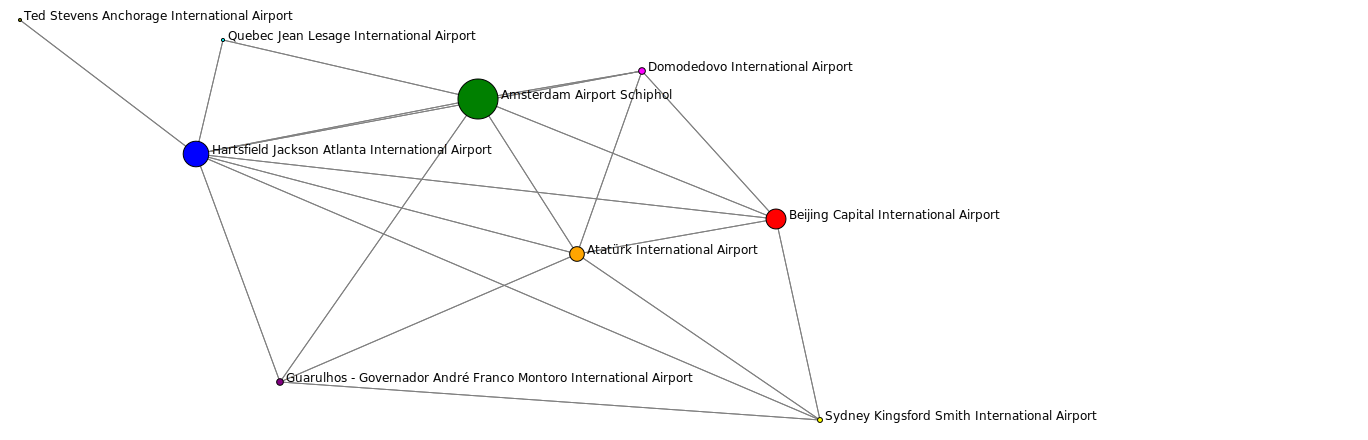

In [86]:
_, counts = np.unique(labels, return_counts=True)
index = np.argwhere(counts >= 100).ravel()
image = visualize_graph(adjacency_aggregate[index][:,index], position_aggregate[index], names=names[airports][index], labels=np.unique(labels)[index], display_node_weight=True, width=800, height=400, edge_width_max=200)
SVG(image)

In [87]:
cluster_traffic = adjacency_aggregate.sum(axis=1).A1
max_cluster_id = np.argmax(cluster_traffic)
print(f"Cluster with highest traffic: {names[airports[max_cluster_id]]}")
print(f"Total traffic: {cluster_traffic[max_cluster_id]}")

Cluster with highest traffic: Amsterdam Airport Schiphol
Total traffic: 22940.0


## 2. Directed graphs

## Wikipedia Vitals

In [88]:
graph = wikivitals

In [89]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank.
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Among these clusters, which is the strongest? Interpret the result.
* Repeat the same experiments at resolution 2.

In [90]:
louvain = Louvain(resolution=1)
labels = louvain.fit_predict(adjacency)

In [91]:
pagerank = PageRank()
top_pages = []

for label in np.unique(labels):
    cluster_indices = np.where(labels == label)[0]
    personalization = np.zeros(adjacency.shape[0])
    personalization[cluster_indices] = 1
    scores = pagerank.fit_predict(adjacency, personalization)
    top_idx = cluster_indices[np.argsort(scores[cluster_indices])[::-1][:5]]
    top_pages.append(names[top_idx])
    print(f"Cluster {label}:", names[top_idx])

Cluster 0: ['Physics' 'Hydrogen' 'Oxygen' 'Kelvin' 'Albert Einstein']
Cluster 1: ['Taxonomy (biology)' 'Animal' 'Plant' 'Protein' 'Species']
Cluster 2: ['Latin' 'World War I' 'Roman Empire' 'Middle Ages' 'Greek language']
Cluster 3: ['Christianity' 'Aristotle' 'Catholic Church' 'Plato'
 'Age of Enlightenment']
Cluster 4: ['United States' 'World War II' 'Geographic coordinate system'
 'United Kingdom' 'France']
Cluster 5: ['China' 'India' 'Buddhism' 'Islam' 'Chinese language']
Cluster 6: ['The New York Times' 'New York City' 'Time (magazine)' 'BBC'
 'The Washington Post']
Cluster 7: ['Earth' 'Atlantic Ocean' 'Europe' 'Drainage basin' 'Pacific Ocean']
Cluster 8: ['Handbag' 'Hat' 'Veil' 'Uniform' 'Clothing']


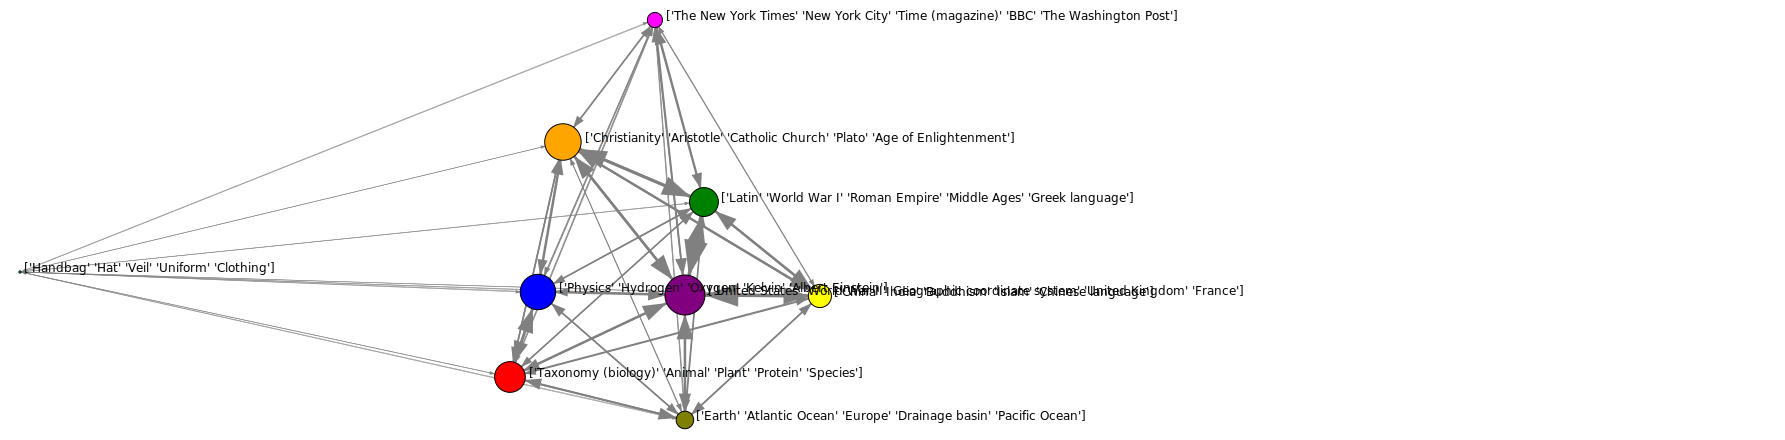

In [92]:
adjacency_aggregate = louvain.aggregate_

image = visualize_graph(adjacency_aggregate, names=top_pages, labels=np.unique(labels), display_node_weight=True, display_edge_weight=True, width=800, height=400)
SVG(image)

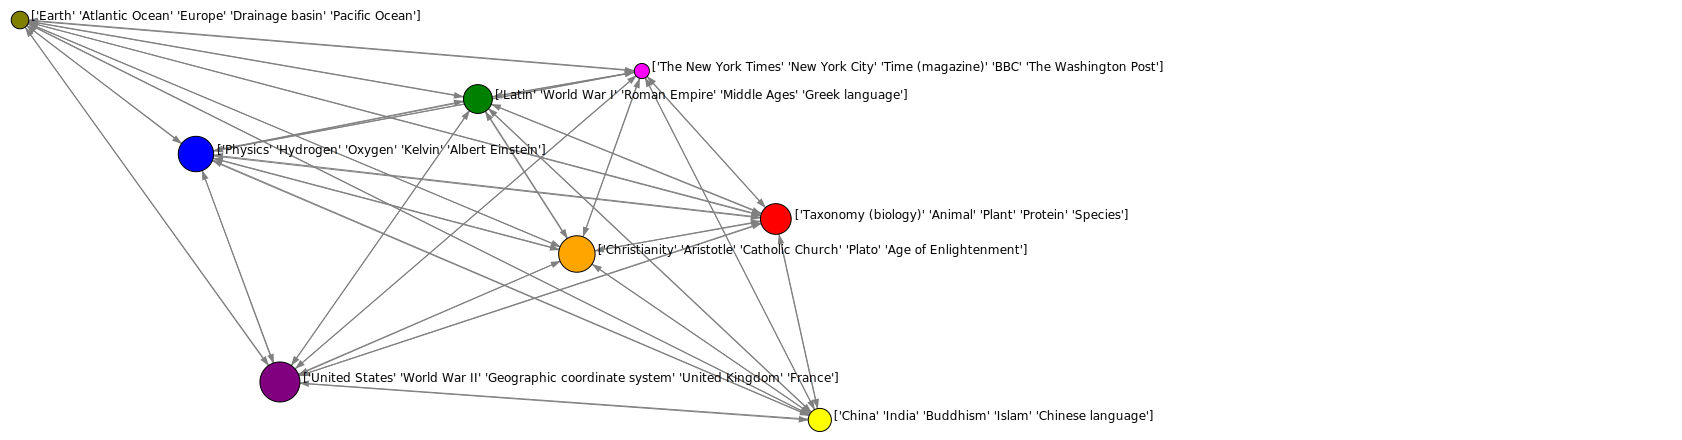

In [93]:
_, counts = np.unique(labels, return_counts=True)
index = np.argwhere(counts >= 100).ravel()
top_pages_selected = [top_pages[i] for i in index]
image = visualize_graph(adjacency_aggregate[index][:,index], position_aggregate[index], names=top_pages_selected, labels=np.unique(labels)[index], display_node_weight=True, width=800, height=400, edge_width_max=200)
SVG(image)

In [94]:
# Compute the total volume (sum of edge weights) for each cluster in the aggregate graph
cluster_volumes = adjacency_aggregate.sum(axis=1).A1
strongest_cluster_id = np.argmax(cluster_volumes)
print(f"The strongest cluster is cluster {strongest_cluster_id} with top page(s): {top_pages[strongest_cluster_id]}")
print(f"Total volume (sum of edge weights): {cluster_volumes[strongest_cluster_id]}")

The strongest cluster is cluster 3 with top page(s): ['Christianity' 'Aristotle' 'Catholic Church' 'Plato'
 'Age of Enlightenment']
Total volume (sum of edge weights): 136512.0


The strongest cluster is the one with the highest total volume, meaning it has the largest sum of connections (internal and external). This indicates that the cluster is the most "central" or "influential" in the network, aggregating the most important or well-connected pages.

In [95]:
louvain = Louvain(resolution=2)
labels = louvain.fit_predict(adjacency)

pagerank = PageRank()
top_pages = []

for label in np.unique(labels):
    cluster_indices = np.where(labels == label)[0]
    personalization = np.zeros(adjacency.shape[0])
    personalization[cluster_indices] = 1
    scores = pagerank.fit_predict(adjacency, personalization)
    top_idx = cluster_indices[np.argsort(scores[cluster_indices])[::-1][:5]]
    top_pages.append(names[top_idx])
    print(f"Cluster {label}:", names[top_idx])

Cluster 0: ['Taxonomy (biology)' 'Animal' 'Chordate' 'Permian' 'Cambrian']
Cluster 1: ['The New York Times' 'BBC' 'Time (magazine)' 'The Washington Post'
 'Library of Congress']
Cluster 2: ['Physics' 'Albert Einstein' 'Isaac Newton' 'Kelvin' 'Electron']
Cluster 3: ['World Health Organization' 'Medical diagnosis' 'Cancer'
 'Central nervous system' 'Immune system']
Cluster 4: ['Jewellery' 'Wood' 'Industrial Revolution' 'Axe' 'Agriculture']
Cluster 5: ['Real number' 'Function (mathematics)' 'Complex number'
 'Set (mathematics)' 'Mathematical analysis']
Cluster 6: ['Aristotle' 'Plato' 'Immanuel Kant' 'David Hume' 'Age of Enlightenment']
Cluster 7: ['Christianity' 'Catholic Church' 'Buddhism' 'Islam' 'Hinduism']
Cluster 8: ['Ottoman Empire' 'Roman Empire' 'Byzantine Empire' 'Iran'
 'Persian language']
Cluster 9: ['Paris' 'London' 'Modernism' 'Renaissance' 'Rome']
Cluster 10: ['World War II' 'World War I' 'Soviet Union' 'Cold War' 'United Nations']
Cluster 11: ['China' 'Chinese language' 'Ja

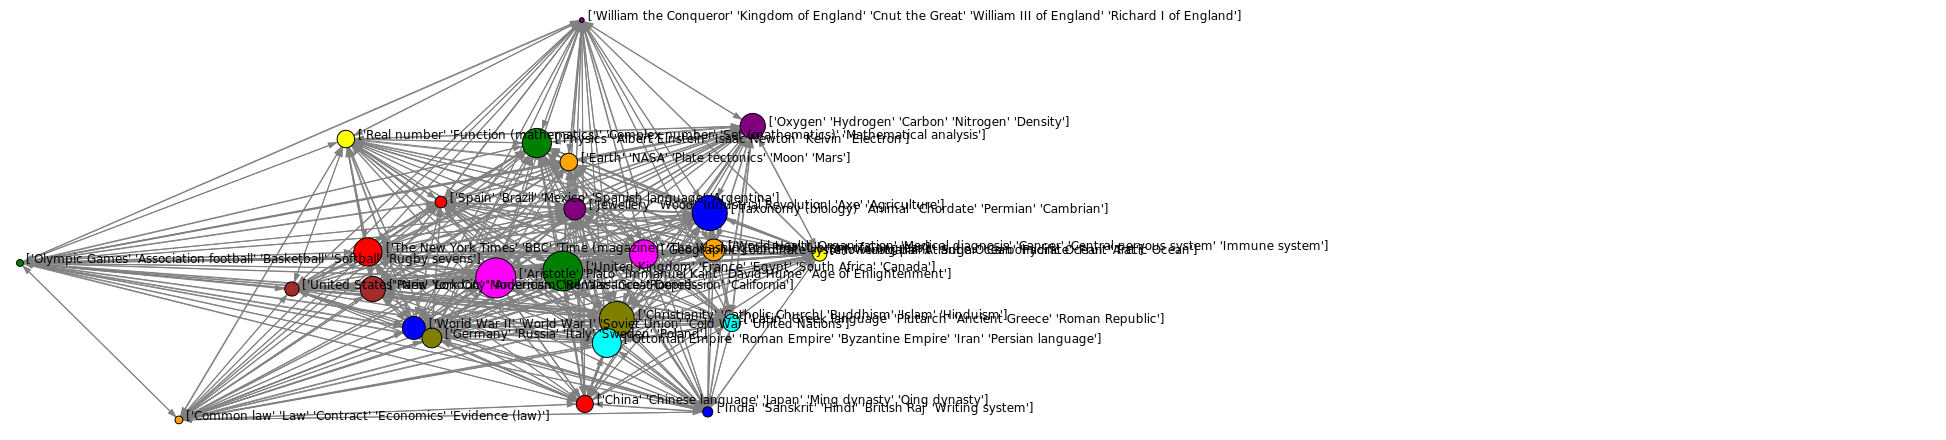

In [96]:
adjacency_aggregate = louvain.aggregate_

image = visualize_graph(adjacency_aggregate, names=top_pages, labels=np.unique(labels), display_node_weight=True, width=800, height=400, edge_width_max=200)
SVG(image)

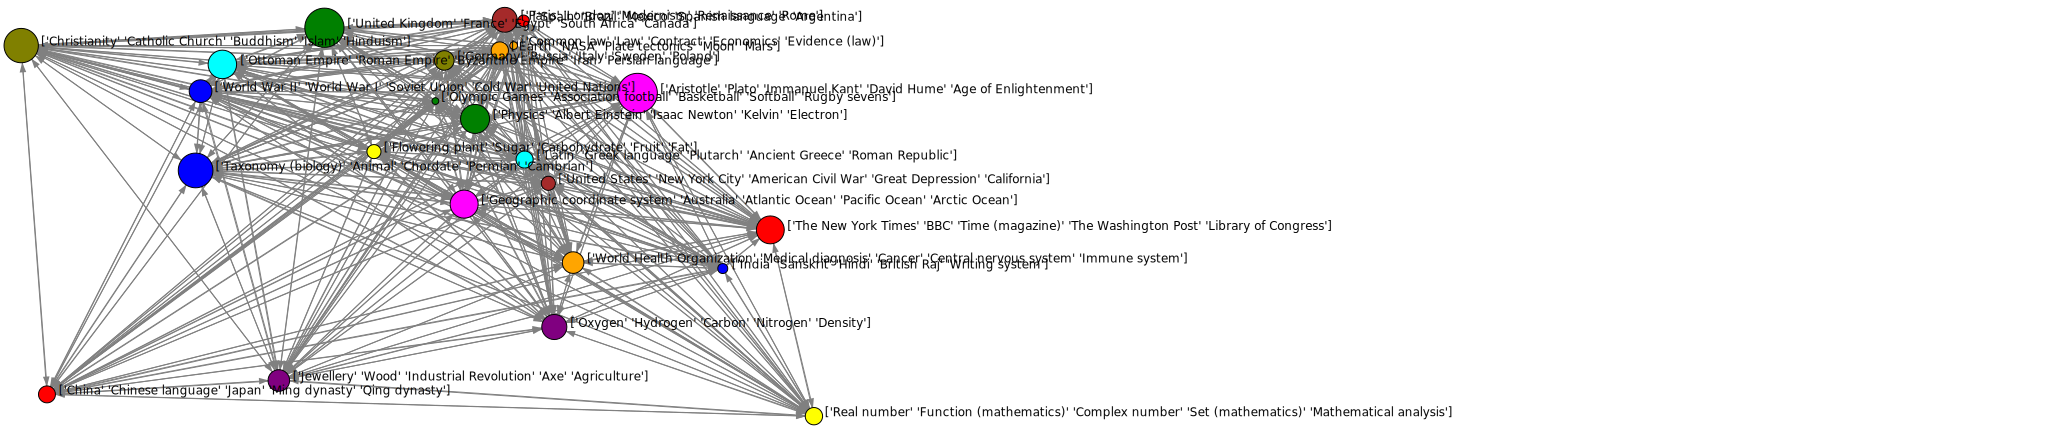

In [97]:
_, counts = np.unique(labels, return_counts=True)
index = np.argwhere(counts >= 100).ravel()
top_pages_selected = [top_pages[i] for i in index]
image = visualize_graph(adjacency_aggregate[index][:,index], position_aggregate[index], names=top_pages_selected, labels=np.unique(labels)[index], display_node_weight=True, width=800, height=400, edge_width_max=200)
SVG(image)

In [98]:
cluster_volumes = adjacency_aggregate.sum(axis=1).A1
strongest_cluster_id_2 = np.argmax(cluster_volumes)
print(f"The strongest cluster (resolution 2) is cluster {strongest_cluster_id_2} with top page(s): {top_pages[strongest_cluster_id_2]}")
print(f"Total volume (sum of edge weights): {cluster_volumes[strongest_cluster_id_2]}")

The strongest cluster (resolution 2) is cluster 6 with top page(s): ['Aristotle' 'Plato' 'Immanuel Kant' 'David Hume' 'Age of Enlightenment']
Total volume (sum of edge weights): 65323.0


## 3. Bipartite graphs

## Cinema

In [99]:
dataset = cinema

In [100]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do

* Cluster the graph by Louvain (resolution 1). 
* List the 10 largest clusters and display the names of the top-3 actors and top-3 movies of these cluster in terms of Personalized PageRank.

In [101]:
louvain = Louvain(resolution=1)
labels = louvain.fit_predict(biadjacency)

adjacency_aggregate = louvain.aggregate_
labels_row = louvain.labels_row_
labels_col = louvain.labels_col_

pagerank = PageRank()
top_movies = []
top_actors = []
# Find the 10 largest clusters
labels_unique, counts = np.unique(labels, return_counts=True)
largest_clusters = labels_unique[np.argsort(counts)[::-1][:10]]

for cluster in largest_clusters:
    # Indices of movies and actors in this cluster
    movies_in_cluster = np.where(labels_row == cluster)[0]
    actors_in_cluster = np.where(labels_col == cluster)[0]

    # Personalized PageRank for movies
    personalization_movies = np.zeros(biadjacency.shape[0])
    personalization_movies[movies_in_cluster] = 1
    scores_movies = pagerank.fit_predict(biadjacency, personalization_movies)
    top_movies_idx = movies_in_cluster[np.argsort(scores_movies[movies_in_cluster])[::-1][:3]]
    top_movies_names = movies[top_movies_idx]

    # Personalized PageRank for actors (transpose biadjacency)
    personalization_actors = np.zeros(biadjacency.shape[1])
    personalization_actors[actors_in_cluster] = 1
    scores_actors = pagerank.fit_predict(biadjacency.T, personalization_actors)
    top_actors_idx = actors_in_cluster[np.argsort(scores_actors[actors_in_cluster])[::-1][:3]]
    top_actors_names = actors[top_actors_idx]

    print(f"Cluster {cluster}:")
    print("  Top 3 movies:", ', '.join(top_movies_names))
    print("  Top 3 actors:", ', '.join(top_actors_names))

Cluster 0:
  Top 3 movies: The Walking Dead (TV series), House of Cards (U.S. TV series), Arrow (TV series)
  Top 3 actors: Eric Roberts, Danny Trejo, Donald Sutherland
Cluster 1:
  Top 3 movies: Paramount on Parade, Ziegfeld Follies, The Crusades
  Top 3 actors: William Boyd, John Wayne, Lionel Barrymore
Cluster 2:
  Top 3 movies: Suyamvaram, Kerala Cafe, Paalayam
  Top 3 actors: Mammootty, Jagathy Sreekumar, Prakash Raj
Cluster 3:
  Top 3 movies: Many Kisses Later, Kaamelott, Tatort
  Top 3 actors: Louis de Funès, Gérard Depardieu, Totò
Cluster 4:
  Top 3 movies: Carry On (franchise), Carry On Sergeant, Passport to Pimlico
  Top 3 actors: Christopher Lee, Peter Cushing, John Stuart
Cluster 6:
  Top 3 movies: Immaan Dharam, LOC Kargil, Darna Mana Hai
  Top 3 actors: Mithun Chakraborty, Dharmendra, Naseeruddin Shah
Cluster 5:
  Top 3 movies: The Banquet (1991 film), Lucky Stars, Seven Samurai
  Top 3 actors: Andy Lau, Simon Yam, Eric Tsang
Cluster 7:
  Top 3 movies: Die goldene Stadt, 